# Classification

In [25]:
# Import packages
import os
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# The Natural Language Toolkit (NLTK) will be used for pre-processing and text analysis.
import nltk

nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')    

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize

from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package wordnet to /Users/silvia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/silvia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/silvia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/silvia/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Read data from CSVs
df = pd.read_csv("clean_speech_df.csv")
# Correct for NA, that's an import mistake
df.loc[df["ISO-alpha3 Code"]=="NAM","ISO-alpha2 Code"] = "NA"

In [3]:
#### TODO move this to cleaning
# Edit EU so that it has a region
df.loc[df["ISO-alpha3 Code"] == "EU","ISO-alpha2 Code"] = "EU"
df.loc[df["ISO-alpha3 Code"] == "EU","Sub-region Name"] = "European Union"
df.loc[df["ISO-alpha3 Code"] == "EU","Region Name"] = "Europe"

display(df.isna().sum())

id                                          0
Session                                     0
Year                                        0
ISO-alpha3 Code                             0
Speech                                      0
Global Code                                10
Global Name                                10
Region Code                                10
Region Name                                 0
Sub-region Code                            10
Sub-region Name                             0
Intermediate Region Code                   10
Intermediate Region Name                   10
Country or Area                            10
M49 Code                                   10
ISO-alpha2 Code                             0
Least Developed Countries (LDC)            10
Land Locked Developing Countries (LLDC)    10
Small Island Developing States (SIDS)      10
Developed / Developing Countries           10
dtype: int64

In [4]:
# Get integer classes for regions
# Make dictionary
# Make target column
int_subregion_dict = {name:i for i,name in enumerate(df["Sub-region Name"].unique())}
df["int_subregion"] = df["Sub-region Name"].replace(int_subregion_dict)

In [9]:
# Make pipeline
model = LogisticRegression(solver="saga", max_iter=100)
pipeline = make_pipeline(TfidfVectorizer(),model)
# Use cross validation
scores = cross_val_score(pipeline, df.Speech.values, df.int_subregion.values, verbose=10, cv=5)
print(scores)
# Make a confusion matrix
# Use multinomialNB
# Use logistic regression
# Use random forest
# Sentiment analysis on developed vs developing vs least developed

In [214]:
# Testing single models
X_train, X_test, y_train, y_test = train_test_split(df.Speech.values, df.int_subregion.values, test_size=0.25, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# confusion_matrix(y_test, y_pred)

In [ ]:
\begin{appendices}
\section{Appendix A}\label{AppA}
Here follows the table that describes the performance of the Logistic Regression classifier with regards to each of the classes individually.

\begin{table}
    \centering
    \caption{Performance scores per class for the Logistic Regression classifier}
    \begin{tabular}{r|c|c|c|c}
         & \textbf{Precision} & \textbf{Recall} & \textbf{F1-Score} & \textbf{Instances} \\
         \hline
         Australia and New Zealand & 1.00 & 0.90 & 0.95 & 21\\
        %  \hline
         Central Asia & 1.00 & 0.90 & 0.95 & 34\\
        %  \hline
         Eastern Asia & 1.00 & 0.98 & 0.99 & 53\\
        %  \hline
         Eastern Europe & 0.99 & 0.97 & 0.98 & 102\\
        %  \hline
         European Union & 0.00 & 0.00 & 0.00 & 3\\
        %  \hline
         Latin America and the Caribbean & 0.96 & 0.99 & 0.97 & 390\\
        %  \hline
         Melanesia & 1.00 & 0.89 & 0.94 & 47\\
        %  \hline
         Micronesia & 1.00 & 0.97 & 0.98 & 31\\
        %  \hline
         Northern Africa & 1.00 & 0.83 & 0.91 & 72\\
        %  \hline
         Northern America & 1.00 & 0.62 & 0.77 & 24\\
        %  \hline
         Northern Europe & 0.89 & 0.96 & 0.93 & 103\\
        %  \hline
         Polynesia & 1.00 & 0.88 & 0.94 & 17\\
        %  \hline
         South-eastern Asia & 0.98 & 0.92 & 0.95 & 132\\
        %  \hline
         Southern Asia & 1.00 & 0.97 & 0.99 & 105\\
        %  \hline
         Southern Europe & 0.98 & 0.95 & 0.97 & 123\\
        %  \hline
         Sub-Saharan Africa & 0.95 & 1.00 & 0.97 & 539\\
        %  \hline
         Western Asia & 0.96 & 1.00 & 0.98 & 203\\
        %  \hline
         Western Europe & 0.98 & 0.93 & 0.95 & 100\\
         
    
    \end{tabular}
    \label{table:scores}
\end{table}
\section{Appendix B}
This appendix contains the confusion matrix for the Logistic Regression classifier. Labels had to be removed because of the high amount of classes.
\begin{figure}
\includegraphics[width=\textwidth]{Images/confusion_matrix.png}
\caption{Confusion matrix for the Logistic Regression classifier} \label{fig:matrix}
\end{figure}
\end{appendices}

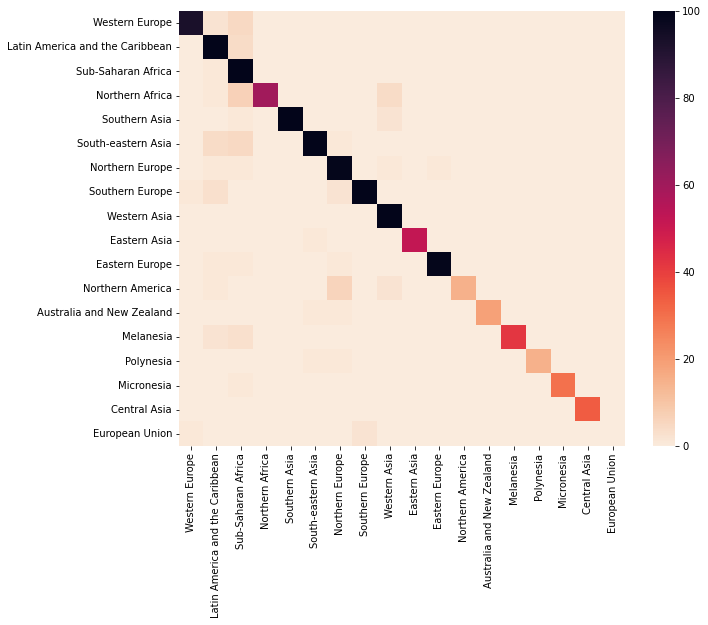

In [213]:
# fig = plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(figsize=(10, 8))
from sklearn.metrics import ConfusionMatrixDisplay

h = sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred),cmap="rocket_r",vmax=100)
h.set_xticklabels(int_subregion_dict.keys())
h.set_yticklabels(int_subregion_dict.keys())
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

In [186]:
from sklearn.metrics import recall_score, accuracy_score, multilabel_confusion_matrix, roc_auc_score, classification_report

# recall_score(y_true=y_test, y_pred=y_pred, average="weighted"), balanced_accuracy_score(y_true=y_test, y_pred=y_pred)


results = pd.DataFrame(data={"true_value":y_test,"predicted_value":y_pred})
results = results.replace(int_subregion_dict_r)

# report = classification_report(y_true=y_test, y_pred=y_pred)
# print(report)
report = classification_report(y_true=results.true_value, y_pred=results.predicted_value)
print(report)

roc_auc_score(y_test,pipeline.predict_proba(X_test),multi_class="ovr")

/Users/silvia/.conda/envs/campaign_insights/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

      Australia and New Zealand       1.00      0.90      0.95        21
                   Central Asia       1.00      1.00      1.00        34
                   Eastern Asia       1.00      0.98      0.99        53
                 Eastern Europe       0.99      0.97      0.98       102
                 European Union       0.00      0.00      0.00         3
Latin America and the Caribbean       0.96      0.99      0.97       390
                      Melanesia       1.00      0.89      0.94        47
                     Micronesia       1.00      0.97      0.98        31
                Northern Africa       1.00      0.83      0.91        72
               Northern America       1.00      0.62      0.77        24
                Northern Europe       0.89      0.96      0.93       103
                      Polynesia       1.00      0.88      0.94        17
             South-eastern Asia       0.98      0.

0.9996753301045336

In [180]:
results[results["true_value"]=="European Union"] # Still gets classified as either west or southern europe
results[results["true_value"]=="Northern America"]["predicted_value"].value_counts() # Mostly classified as northern europe, makes sense
results[results["predicted_value"]=="Sub-Saharan Africa"]["true_value"].value_counts() # Mostly used as a misclassifier for northern africa
results[results["true_value"]=="Northern Africa"]["predicted_value"].value_counts() # Misclassified mostly as sub-saharan africa and western asia
results[results["true_value"]=="Southern Europe"]["predicted_value"].value_counts() # Misclassified mostly as Latin america or other european regions
results[results["true_value"]=="South-eastern Asia"]["predicted_value"].value_counts() # Misclassified mostly as Latin america or other european regions


South-eastern Asia                 122
Sub-Saharan Africa                   5
Latin America and the Caribbean      4
Northern Europe                      1
Name: predicted_value, dtype: int64

Western Europe
[[1997    2]
 [   7   93]]


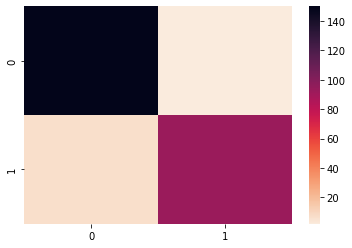

Latin America and the Caribbean
[[1693   16]
 [   4  386]]


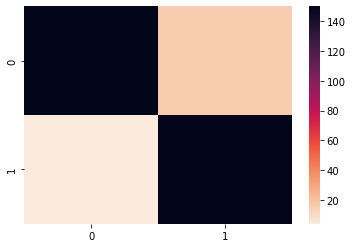

Sub-Saharan Africa
[[1532   28]
 [   1  538]]


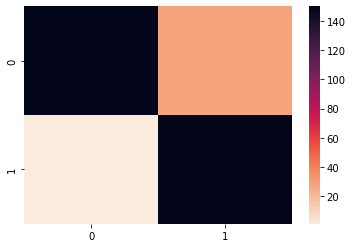

Northern Africa
[[2027    0]
 [  12   60]]


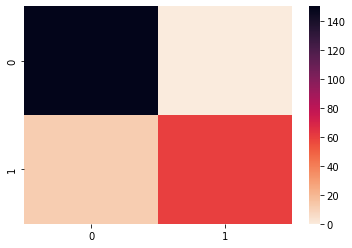

Southern Asia
[[1994    0]
 [   3  102]]


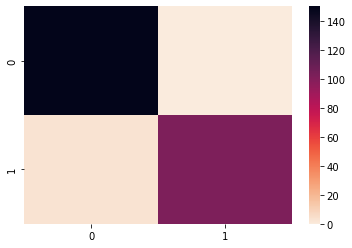

South-eastern Asia
[[1964    3]
 [  10  122]]


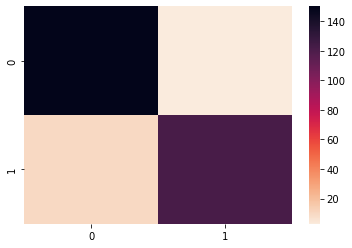

Northern Europe
[[1984   12]
 [   4   99]]


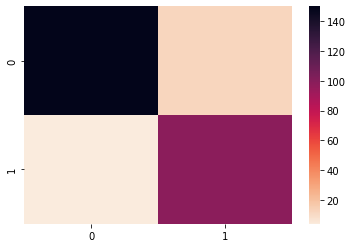

Southern Europe
[[1974    2]
 [   6  117]]


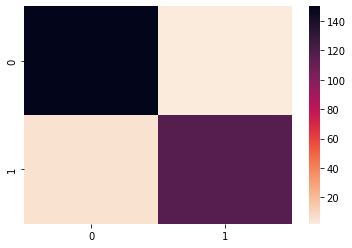

Western Asia
[[1887    9]
 [   0  203]]


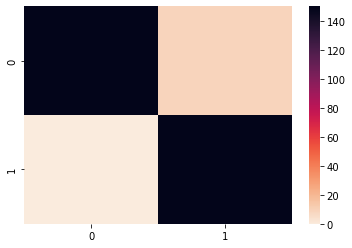

Eastern Asia
[[2046    0]
 [   1   52]]


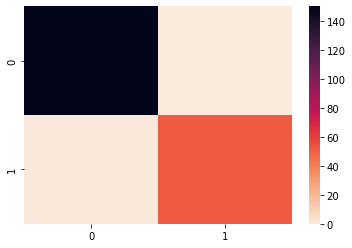

Eastern Europe
[[1996    1]
 [   3   99]]


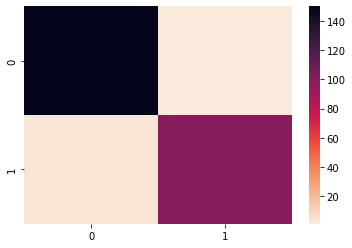

Northern America
[[2075    0]
 [   9   15]]


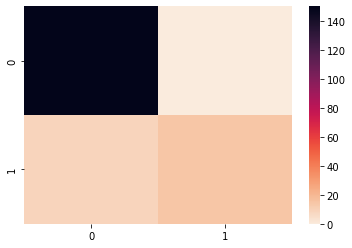

Australia and New Zealand
[[2078    0]
 [   2   19]]


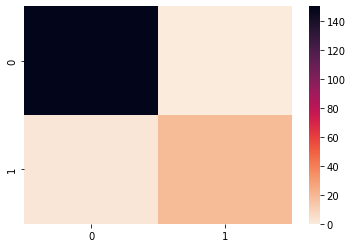

Melanesia
[[2052    0]
 [   5   42]]


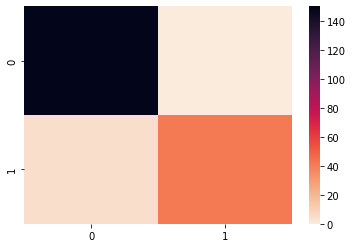

Polynesia
[[2082    0]
 [   2   15]]


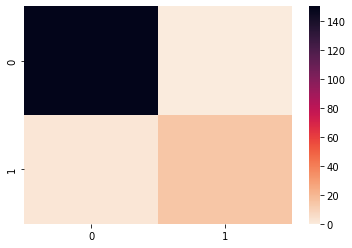

Micronesia
[[2068    0]
 [   1   30]]


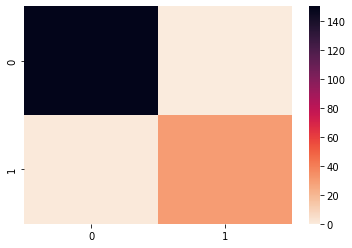

Central Asia
[[2065    0]
 [   0   34]]


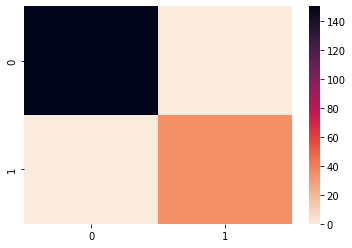

European Union
[[2096    0]
 [   3    0]]


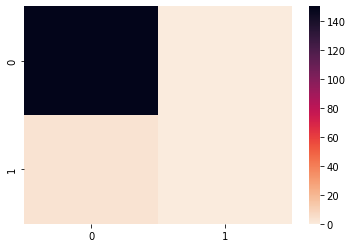

In [156]:
for i, matrix in enumerate(multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred)):
    print(int_subregion_dict_r[i])
    # print(i)
    print(matrix)
    h = sns.heatmap(matrix,cmap="rocket_r",vmax=150)
    plt.show()
